## Project: Developer's Salaries

In this project, we analyze workforce data from Norway to explore the relationships between various factors such as Gender, Education, Experience, Workplace, Employment Status, Field, Salary, and Bonuses. The goal is to understand how these variables influence salaries and identify key trends in the Norwegian labor market.

### Questions
The Developer's Salaries dataset is very rich, and many questions could be posed here. The following are the suggested questions:

1. Where is the largest number of workers located?
2. In which Gender do we find the largest number of workers?
3. In which sectors do we find the largest number of workers?
4. What is the relationship between workplace and field?
5. What is the relationship between status and field?
6. What is the relationship between Experience and field?
7. What is the relationship between Employment and field?
8. What is the relationship between Education and field?
9. Where and in which employment status are most bonuses given?


### Import Libraries
In this section, I will import the libraries we need to use

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Data Wrangling

In this section, I will load the dataset into the notebook, view few rows of it, explore the general charactersitics of this dataset and spot missing or errant data -if any-

In [6]:
# load the dataset to notebook as dataframe
data = pd.read_csv('salaries.csv')

In [7]:
# dislay the first (5) rows of the dataframe 
data.head()

,kjønn,utdanning,erfaring,arbeidssted,arbeidssituasjon,fag,lønn,bonus?
0,mann,4,7,Agder,"in-house, privat sektor",AI / maskinlæring,865000,Nei
1,mann,5,2,Nordland,"in-house, offentlig/kommunal sektor",AI / maskinlæring,756000,Nei
2,mann,4,30,Oslo,konsulent,AI / maskinlæring,1500000,Nei
3,mann,5,25,Oslo,konsulent,AI / maskinlæring,1200000,Nei
4,mann,9,18,Oslo,"in-house, privat sektor",AI / maskinlæring,1200000,Nei


##### Note:
This data is written in Norwegian. In order for us to understand it correctly, I have translated it into English by translating the column headers as well as the content.

In [9]:
# Translating the headings into English

data = data.rename(columns={'kjønn':'Gender',
                           'utdanning':'Education',
                           'erfaring':'Experience',
                           'arbeidssted':'Workplace',
                           'arbeidssituasjon':'Employment',
                           'fag':'status',
                           'lønn':'Field',
                           'bonus?':'Bonus?'})

In [10]:
# Translating the dataset content into English

data['Gender'] = data['Gender'].replace({'mann': 'man',
                        'kvinne':'woman',
                        'annet / ønsker ikke oppgi':'other / prefer not to specify'})

data['Employment'] = data['Employment'].replace({'in-house, privat sektor': 'in-house, private sector',
                            'konsulent':'consultant',
                            'in-house, offentlig/kommunal sektor':'in-house, public/municipal sector',
                            'frilans / selvstendig næringsdrivende':'freelance / self-employed'})

data['Bonus?'] = data['Bonus?'].replace({'Nei': 'No',
                                         'Ja':'Yes'})

data['status'] = data['status'].replace({'fullstack': 'fullstack',
                            'backend':'backend',
                            'frontend':'frontend',
                            'ledelse/administrativt':'management/administrative',
                            'devops / drift':'devops / operations',
                            'arkitektur':'architecture',
                            'app':'app',
                            'programvare':'software',
                            'sikkerhet':'security',
                            'UX / design':'UX / design',
                            'annet':'other',
                            'data science':'data science',
                            'databaser':'databases',
                            'automatisering':'automation',
                            'testing':'testing',
                            'AI / maskinlæring':'AI / machine learning',
                            'embedded / IOT / maskinvare':'embedded / IOT / hardware'})

In [11]:
# dislay the first (5) rows of the dataset 
data.head()

,Gender,Education,Experience,Workplace,Employment,status,Field,Bonus?
0,man,4,7,Agder,"in-house, private sector",AI / machine learning,865000,No
1,man,5,2,Nordland,"in-house, public/municipal sector",AI / machine learning,756000,No
2,man,4,30,Oslo,consultant,AI / machine learning,1500000,No
3,man,5,25,Oslo,consultant,AI / machine learning,1200000,No
4,man,9,18,Oslo,"in-house, private sector",AI / machine learning,1200000,No


In [12]:
# display the last (5) rows of the dataset
data.tail()

,Gender,Education,Experience,Workplace,Employment,status,Field,Bonus?
2677,man,3,14,Vestfold og Telemark,"in-house, public/municipal sector",UX / design,720000,No
2678,man,5,8,Vestland,consultant,UX / design,875000,No
2679,man,0,23,Viken,"in-house, private sector",UX / design,1300000,No
2680,man,3,15,Viken,consultant,UX / design,1000000,Yes
2681,woman,3,1,Viken,"in-house, private sector",UX / design,665000,No


In [13]:
#check the size (dimensions) of the dataset. It contain (2682) rows with (8) columns
data.shape

(2682, 8)

In [14]:
# some statistics about numerical variables of the dataset
data.describe()

,Education,Experience,Field
count,2682.000000,2682.000000,2.682000e+03
mean,4.127517,8.568606,8.980438e+05
std,2.842134,7.770099,2.882830e+05
min,0.000000,0.000000,3.000000e+05
25%,3.000000,3.000000,7.000000e+05
50%,3.000000,6.000000,8.500000e+05
75%,5.000000,13.000000,1.020000e+06
max,20.000000,44.000000,2.700000e+06


In [15]:
# check for missing values -if any-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      2682 non-null   object
 1   Education   2682 non-null   int64 
 2   Experience  2682 non-null   int64 
 3   Workplace   2682 non-null   object
 4   Employment  2682 non-null   object
 5   status      2682 non-null   object
 6   Field       2682 non-null   int64 
 7   Bonus?      2682 non-null   object
dtypes: int64(3), object(5)
memory usage: 167.8+ KB


In [16]:
# Check the number of dubplicated rows -if any-
sum(data.duplicated())

37

In [17]:
# check variables datatype
data.dtypes

Gender        object
Education      int64
Experience     int64
Workplace     object
Employment    object
status        object
Field          int64
Bonus?        object
dtype: object

#####  Note
- the number of miising values = 0
- the number of dubplicated rows = 37
- datatype is correct

### Data Cleaning
In this section, I will drop duplicated rows

In [20]:
# Remove the duplicated row
data.drop_duplicates(inplace=True)

In [21]:
# Check the number of dubplicated rows again
sum(data.duplicated())

0

In [22]:
data_clean = data
data_clean.head()

,Gender,Education,Experience,Workplace,Employment,status,Field,Bonus?
0,man,4,7,Agder,"in-house, private sector",AI / machine learning,865000,No
1,man,5,2,Nordland,"in-house, public/municipal sector",AI / machine learning,756000,No
2,man,4,30,Oslo,consultant,AI / machine learning,1500000,No
3,man,5,25,Oslo,consultant,AI / machine learning,1200000,No
4,man,9,18,Oslo,"in-house, private sector",AI / machine learning,1200000,No


In [23]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2645 entries, 0 to 2681
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      2645 non-null   object
 1   Education   2645 non-null   int64 
 2   Experience  2645 non-null   int64 
 3   Workplace   2645 non-null   object
 4   Employment  2645 non-null   object
 5   status      2645 non-null   object
 6   Field       2645 non-null   int64 
 7   Bonus?      2645 non-null   object
dtypes: int64(3), object(5)
memory usage: 186.0+ KB


In [24]:
# check the size (dimensions) of the dataframe. It contain (2645) rows with (8) columns
data_clean.shape

(2645, 8)

##### Notes:
After removing the duplicate rows, the number of rows is now 2645, and the number of columns is 8. Now, we can say that the data is clean and ready for analysis.

###  Exploratory Data Analysis

#### Research Question 1: Where is the largest number of workers located?

In [28]:
# the number of workers by region
workers_by_region = data_clean['Workplace'].value_counts()
workers_by_region

Workplace
Oslo                    1442
Vestland                 258
Trøndelag                195
Rogaland                 162
Viken                    161
Vestfold og Telemark     111
Agder                     94
Innlandet                 66
Møre og Romsdal           47
Nordland                  45
Troms og Finnmark         36
utlandet                  28
Name: count, dtype: int64

##### Notes:
It is clear that the largest number of workers (1442) working in Oslo, followed by Vestland (258).

- the reason is:

In Oslo, you will find many workers because it is the capital and an economic center, where job opportunities are more abundant, especially in advanced sectors such as artificial intelligence and technology. As for other regions such as Vestland and Trøndelag, despite their importance, the job market size is smaller..

#### Research Question 2: :In which Gender do we find the largest number of workers?

In [31]:
# the number of workers by Gender
data_clean['Gender'].value_counts()

Gender
man                              2262
woman                             364
other / prefer not to specify      19
Name: count, dtype: int64

##### Notes:
It is clear that the number of men (2262) working in these sectors far exceeds that of other genders. Women (364) come second, followed by other genders (19).
- the reason is:
  
The gender disparity is likely due to historical trends in education and employment, where men dominate technical fields.

#### Research Question 3:In which sectors do we find the largest number of workers?

In [34]:
# the number of workers by sectors
data_clean['status'].value_counts()

status
fullstack                    867
backend                      530
frontend                     329
management/administrative    148
devops / operations          134
architecture                 113
app                           72
software                      72
security                      67
UX / design                   55
other                         55
data science                  54
databases                     36
automation                    32
testing                       29
AI / machine learning         29
embedded / IOT / hardware     23
Name: count, dtype: int64

##### Notes:
- The largest number of workers is concentrated in fullstack, backend, and frontend sectors
- A mid number of workers is concentrated in management/administrative, devops/operations, and architecture.
- The lowest number of workers is spread across the remaining sectors.

- the reason is:
  
Tech sectors like Fullstack and Backend are in high demand due to digital transformation.


#### Research Question 4: What is the relationship between workplace and field?

In [37]:
# Grouping by 'Workplace' and finding the maximum value in 'Field'
data_clean.groupby('Workplace')['Field'].max()

Workplace
Agder                   1500000
Innlandet               1600000
Møre og Romsdal         1200000
Nordland                2400000
Oslo                    2700000
Rogaland                2400000
Troms og Finnmark       1650000
Trøndelag               2100000
Vestfold og Telemark    1700000
Vestland                2500000
Viken                   2600000
utlandet                2206000
Name: Field, dtype: int64

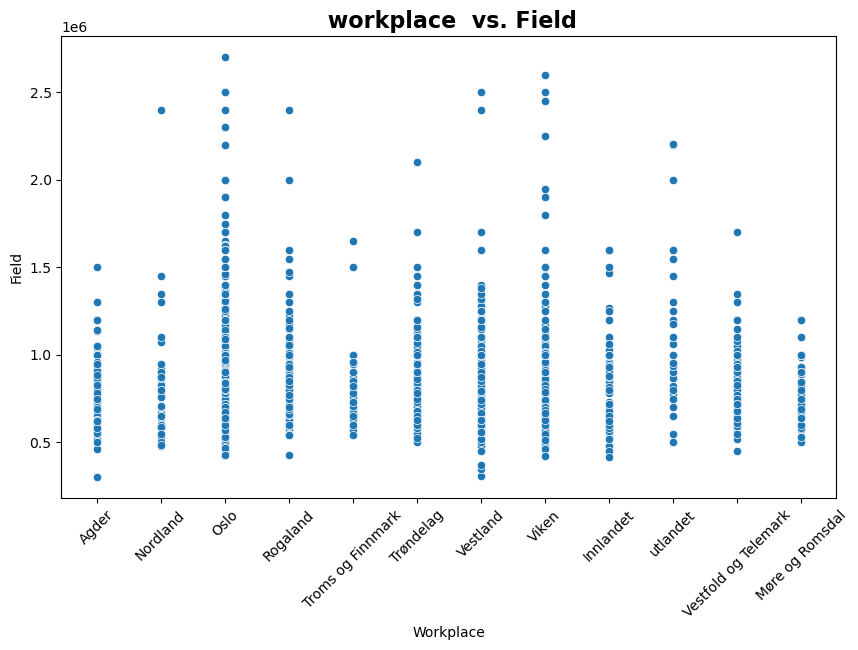

In [38]:
# the relationship between Workplace and Field with scatterplot

plt.figure(figsize=(10,6))
sns.scatterplot(data=data_clean, x='Workplace', y='Field')
plt.title(' workplace  vs. Field', fontsize=16,fontweight='bold')
plt.xticks(rotation=45)
plt.show()

##### Notes:
Clearly, there are differences in salaries based on the region and The region with the highest salaries is Oslo (2700000), followed by Viken (2600000)

#### Research Question 5: What is the relationship between status and field?

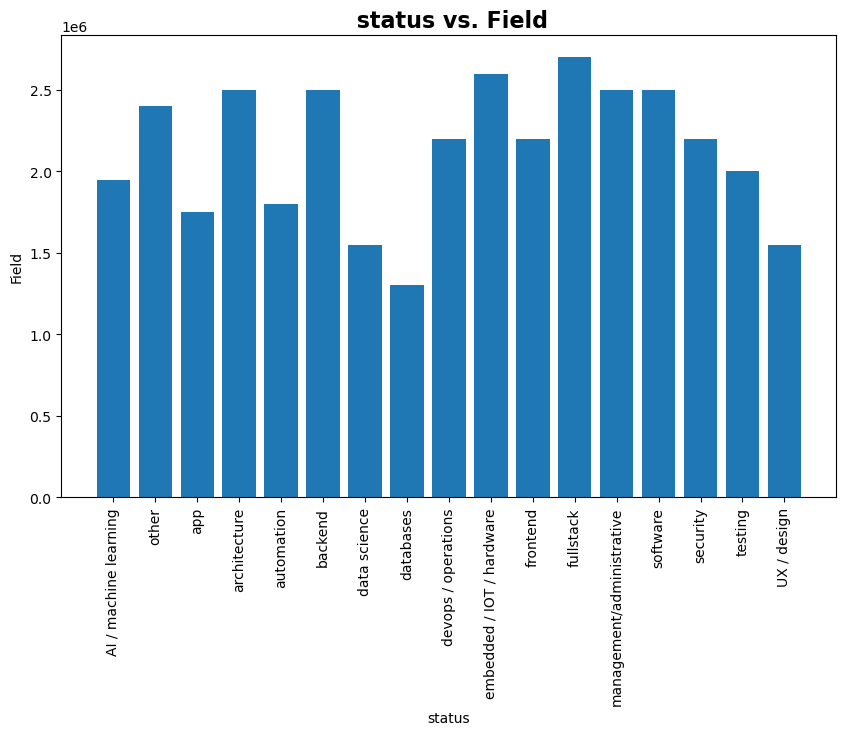

In [41]:
# the relationship between status and Field

plt.figure(figsize=(10,6))
plt.bar(data=data_clean, x='status', height='Field')
plt.title(' status vs. Field', fontsize=16,fontweight='bold')
plt.ylabel('Field')
plt.xlabel('status')
plt.xticks(rotation=90)
plt.show()

##### Note:
- Highest salaries: In fullstack, management/administrative ,embedded , AI/machine learning, security, Devops, and software development due to high demand and a shortage of specialized skills.
- Mid-range salaries: In automation, app development, which require moderate technical and managerial expertise.
- Lowest salaries: In UX/UI design, databases and data science, where competition is high, and more professionals are available.

These salary differences are driven by market demand, technical complexity, and the impact of automation and technology

#### Research Question 6: What is the relationship between Experience and field?

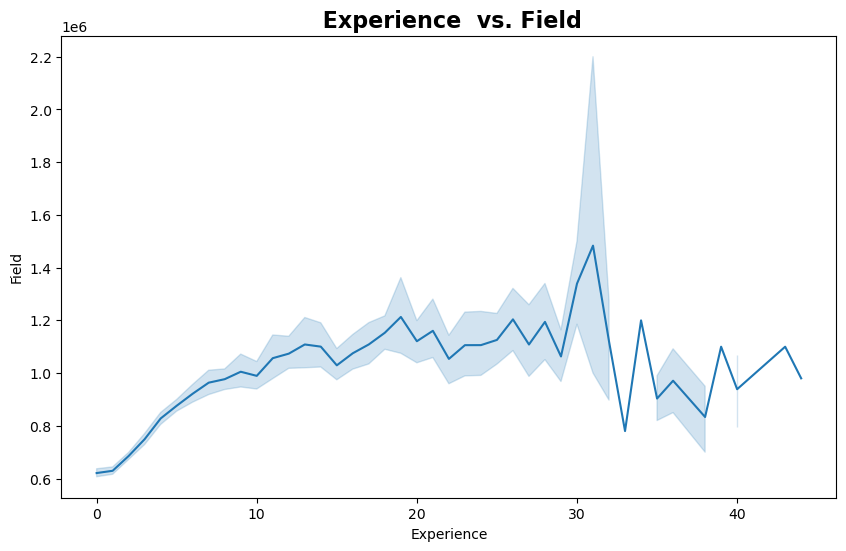

In [44]:
# the relationship between Experience and Field

plt.figure(figsize=(10,6))
sns.lineplot(data=data_clean, x='Experience', y='Field')
plt.title(' Experience  vs. Field', fontsize=16,fontweight='bold')
plt.show()

#### Note:
- Salaries steadily increase up to 25-30 years of experience.
- A sharp salary spike around 30 years, likely due to reaching executive or consulting roles.
- After 30 years, salaries fluctuate or decline, possibly due to retirement, part-time work, or outdated skills.
- The fastest salary growth occurs in the first 10-15 years of experience.

This aligns with labor market trends in Norway, where salaries depend on skills, promotions, demand for expertise, and social policies like retirement support and work-life balance.

#### Research Question 7: What is the relationship between Employment and field?

In [47]:
# This line counts the number of occurrences of each employment status in the 'Employment' column

employee_data = data_clean['Employment'].value_counts()
employee_data

Employment
in-house, private sector             1185
consultant                           1094
in-house, public/municipal sector     313
freelance / self-employed              53
Name: count, dtype: int64

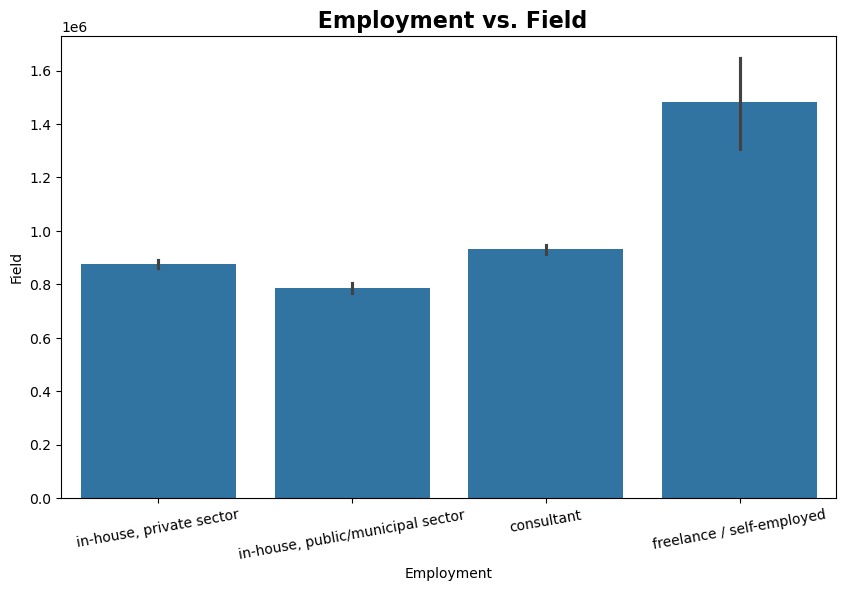

In [48]:
# the relationship between Employment and Field

plt.figure(figsize=(10,6))
sns.barplot(x='Employment', y='Field', data=data_clean)
plt.title(' Employment vs. Field', fontsize=16,fontweight='bold')
plt.xticks(rotation=10)
plt.show()

##### Note:
The number of employees in the private sector (1185) exceeds that in other sectors, yet freelancers clearly earn significantly higher salaries
- the reason is: 

Private companies dominate employment, especially in tech fields.
Freelancing offers flexibility and allows skilled professionals to negotiate higher rates based on their expertise.

#### Research Question 8: What is the relationship between Education and Field?

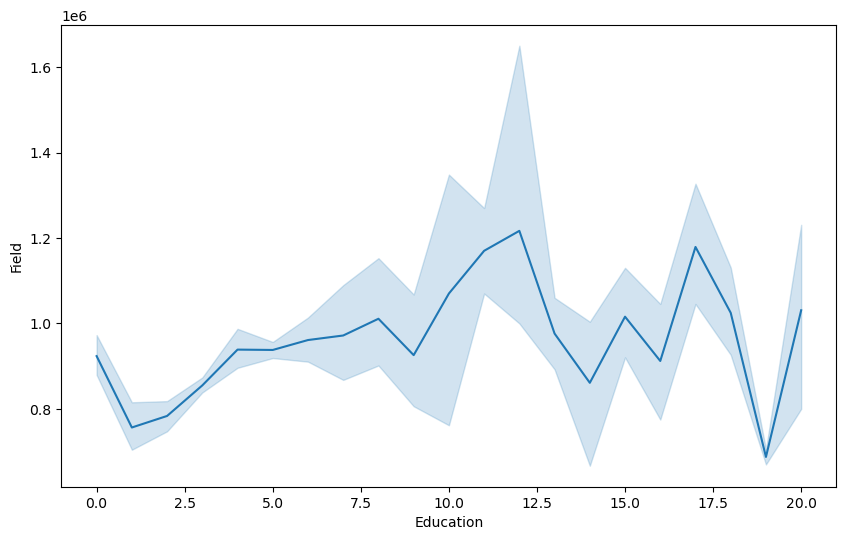

In [51]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data_clean,x='Education',y='Field')
plt.show()

##### Notes:
- It seems that there is a positive relationship between education level and salary, as income increases with higher education levels, despite some fluctuations.
- at advanced education levels between 12 to 20 years, there is noticeable income variability, suggesting that higher education does not always guarantee a higher salary but can lead to significant wage disparities.
- at lower education levels (less than 5 years), the average income appears to be low.

- the reason is:
  - Higher education improves access to high-paying jobs but is not the sole determinant of salary.
  - In some industries, experience and practical skills may be more valuable than academic degrees.
  - The financial return on education varies by field, as some degrees require extensive study but do not guarantee high wages.

#### Research Question 9: Where and in which employment status are most bonuses given?

In [54]:
# This line filters the data to show only the entries where the 'Bonus?' column is 'Yes'

bonus_data = data[data['Bonus?']=='Yes']

In [55]:
# This line counts the number of occurrences of each workplace in the filtered dataset 'bonus_data'

bonus_counts = bonus_data['Workplace'].value_counts()
bonus_counts

Workplace
Oslo                    472
Rogaland                 72
Vestland                 70
Trøndelag                65
Viken                    63
Vestfold og Telemark     32
Agder                    23
Innlandet                19
Møre og Romsdal          14
Nordland                 13
Troms og Finnmark        11
utlandet                 10
Name: count, dtype: int64

In [56]:
# This line counts the number of occurrences of each employment status in the filtered dataset 'data_bonus'

bonus_counts = bonus_data['status'].value_counts()
bonus_counts

status
fullstack                    266
backend                      172
frontend                      84
management/administrative     60
devops / operations           52
architecture                  41
security                      26
software                      23
other                         21
data science                  20
app                           19
automation                    19
testing                       17
databases                     15
UX / design                   10
embedded / IOT / hardware     10
AI / machine learning          9
Name: count, dtype: int64

##### Notes:
It is clear that in the Oslo region, fullstack workers receive the highest amount of bonuses

- the reason is:

Oslo hosts major companies and tech firms, increasing financial incentives and bonuses.
Fullstack developers possess highly demanded skills, making them more eligible for higher bonuses

## conclusions

These findings align with trends in the Norwegian labor market, where salaries are influenced by:

1. Technical skills and their market demand.

2. Geographical location, with major cities like Oslo offering higher wages.

3. Work experience, where salaries grow with professional advancement.

4. Education, which plays a role but is not the sole factor in determining salary.

5. Employment type, as freelancers tend to earn more than traditional employees.


These trends reflect Norway’s economic policies, which emphasize supporting freelance work, fostering technological growth, and maintaining a strong work-life balance.

### References

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

https://chatgpt.com/